Implementar las funciones necesarias para calcular la verosimilitud y el logaritmo de verosimilitud.

In [2]:
import numpy as np

def p_hat(p, y):
    """
    Calcula la probabilidad de la clase y en la predicción del modelo p.

    Parameters:
    - p: float, probabilidad de clase predicha por el modelo1.
    - y: int, clase real (0 o 1).

    Returns:
    - float, probabilidad de la clase y.
    """
    # Probabilidad de la clase y en la predicción del modelo p
    return p if y == 1 else 1 - p

In [3]:
def log_p_hat(p, y):
    """
    Calcula el logaritmo de la probabilidad de la clase y en la predicción del modelo p.

    Parameters:
    - p: float, predicho por el modelo probabilidad de la clase 1.
    - y: int, clase real (0 o 1).

    Returns:
    - float, El logaritmo de la probabilidad de la clase y.
    """
    # El logaritmo de la probabilidad de la clase y en el modelo de predicción p
    return np.log(p_hat(p, y))

In [4]:
def likelihood(ps, ys):
    """
    Calcula la verosimilitud para las probabilidades predichas y las clases reales.

    Parámetros:
    - ps: lista, probabilidades predichas por el modelo para N objetos.
    - ys: lista, clases reales para N objetos.

    Retorna:
    - float, verosimilitud.
    """
    # Cálculo de la verosimilitud
    likelihood_ = np.prod([p_hat(p, y) for (p, y) in zip(ps, ys)])
    return likelihood_

In [5]:
def loglikelihood(ps, ys):
    """
    Calcula el logaritmo de la verosimilitud para las probabilidades predichas y las clases reales.

    Parámetros:
    - ps: lista, probabilidades predichas por el modelo para N objetos.
    - ys: lista, clases reales para N objetos.

    Retorna:
    - float, logaritmo de la verosimilitud.
    """
    # Aplicar log_p_hat a todas las parejas (p, y) y sumar
    log_probs = [log_p_hat(p, y) for (p, y) in zip(ps, ys)]
    loglikelihood_ = np.sum(log_probs)
    return loglikelihood_

In [6]:
test_ps = [0.1, 0.2, 0.3, 0.4]
test_ys = [0, 1, 0, 1]
assert likelihood(test_ps, test_ys) == 0.0504
assert np.allclose(np.log(likelihood(test_ps, test_ys)), loglikelihood(test_ps, test_ys))
print("Tests passed!")

Tests passed!


**Aplicación del principio de máxima verosimilitud en la práctica.**

Supongamos que tenemos una moneda, lanzándola 10 veces obtenemos los siguientes resultados (0 - cruz, 1 - cara):

$$
y = [1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
$$

Nuestra tarea consiste en averiguar los "parámetros" de esta moneda, es decir, la probabilidad de que caiga un águila ($p$).

In [7]:
coins = np.array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

N = 100
p_to_try =  np.linspace(0, 1, N)

liks = [likelihood([p]*10, coins) for p in p_to_try]
logliks = [loglikelihood([p]*10, coins) for p in p_to_try]


C:\Users\Ульяна\AppData\Local\Temp\ipykernel_21268\4118829072.py:13: RuntimeWarning: divide by zero encountered in log
  return np.log(p_hat(p, y))


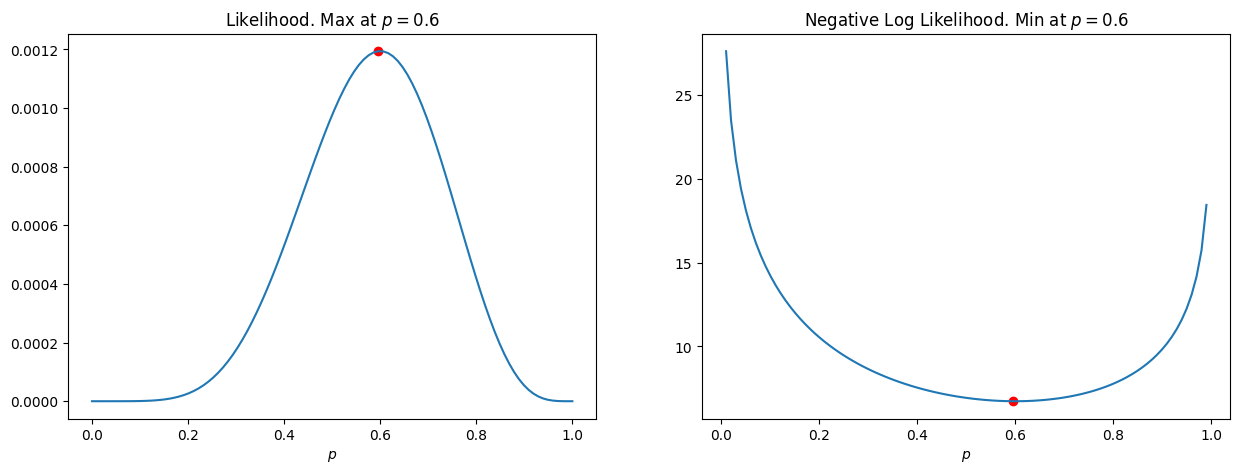

In [9]:
import matplotlib.pyplot as plt

max_lik_ind = np.argmax(liks)
max_loglik_ind = np.argmax(logliks)

fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2)
plt.subplot(grid[0, 0])
plt.plot(p_to_try, liks)
plt.xlabel("$p$")
plt.title(f"Likelihood. Max at $p={p_to_try[max_lik_ind]:.2}$")
plt.scatter(p_to_try[max_lik_ind], liks[max_lik_ind], c='red')

plt.subplot(grid[0, 1])
plt.plot(p_to_try, -np.array(logliks))
plt.scatter(p_to_try[max_loglik_ind], -logliks[max_loglik_ind], c='red')
plt.title(f"Negative Log Likelihood. Min at $p={p_to_try[max_loglik_ind]:.2}$")
_ = plt.xlabel("$p$")